In [1]:
from keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [2]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


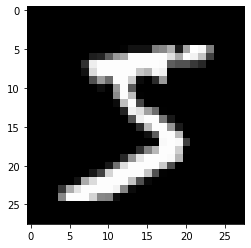

In [3]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________

In [5]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
new_train_data=train_data/255
new_test_data=test_data/255

In [7]:
model.fit(new_train_data,new_train_target,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3732 - accuracy: 0.8863
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0947 - accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0367 - accuracy: 0.9888


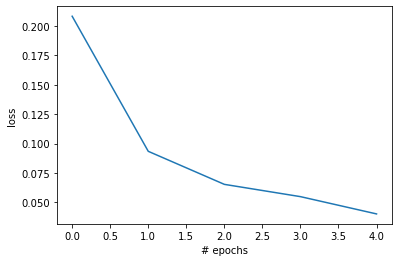

In [8]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

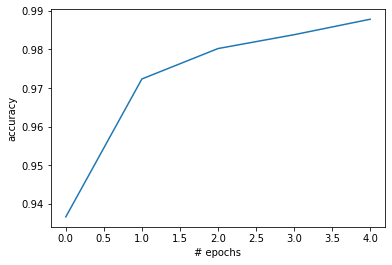

In [9]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [10]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9764


[0.08649465441703796, 0.9764000177383423]

In [11]:
model.save_weights('FFNN-MNIST.h5')

In [12]:
import tkinter as tk
import numpy as np
import cv2

#pip install pillow
from PIL import ImageTk,Image,ImageDraw

from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.load_weights('FFNN-MNIST.h5')

def event_function(event):
    
    x=event.x
    y=event.y
    
    x1=x-30
    y1=y-30
    
    x2=x+30
    y2=y+30

    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

def save():
    
    global count
    
    img_array=np.array(img)
    img_array=cv2.resize(img_array,(28,28))
    
    cv2.imwrite(str(count)+'.jpg',img_array)
    count=count+1

def clear():
    
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_status.config(text='PREDICTED DIGIT: NONE')

def predict():
    
    img_array=np.array(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array=cv2.resize(img_array,(28,28))
    
    img_array=img_array/255.0
    img_array=img_array.reshape(1,28,28)
    result=model.predict(img_array)
    label=np.argmax(result,axis=1)
    
    label_status.config(text='PREDICTED DIGIT:'+str(label))
    
count=0
    
win=tk.Tk()

canvas=tk.Canvas(win,width=500,height=500,bg='white')
canvas.grid(row=0,column=0,columnspan=4)

button_save=tk.Button(win,text='SAVE',bg='green',fg='white',font='Helvetica 20 bold',command=save)
button_save.grid(row=1,column=0)

button_predict=tk.Button(win,text='PREDICT',bg='blue',fg='white',font='Helvetica 20 bold',command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='yellow',fg='white',font='Helvetica 20 bold',command=clear)
button_clear.grid(row=1,column=2)

button_exit=tk.Button(win,text='EXIT',bg='red',fg='white',font='Helvetica 20 bold',command=win.destroy)
button_exit.grid(row=1,column=3)

label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font='Helvetica 24 bold')
label_status.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(500,500),(0,0,0))
img_draw=ImageDraw.Draw(img)

win.mainloop()